In [2]:
import pandas as pd
import io
import matplotlib.pyplot as plt
import subprocess
%matplotlib inline

In [3]:
def profile(*args):
    str_args = list(map(str, *args))
    s = subprocess.run(["./profile.exe", *str_args], capture_output=True)
    csv = s.stdout.decode()
    df = pd.read_csv(io.StringIO(csv))
    return df


In [26]:
def plot_profile(df, log_x=True, log_y=True):
    plt.figure(figsize=(8, 6), dpi=80)

    plt.plot(df["n"], df["q"], label="qsort")
    plt.plot(df["n"], df["my"], label="mysort")


    plt.yscale("log" if log_y else "linear")
    plt.xscale("log" if log_x else "linear")
    plt.legend()
    plt.xlabel("# elements")
    plt.ylabel("$\\mu s$")
    plt.plot(figsize=(10, 10))

In [22]:
df = profile([10, 10**2, 10**3, 10**4, 10**5])
df

,n,q,my
0,10,1,2
1,100,8,50
2,1000,158,3683
3,10000,1929,331095
4,100000,15372,24959778


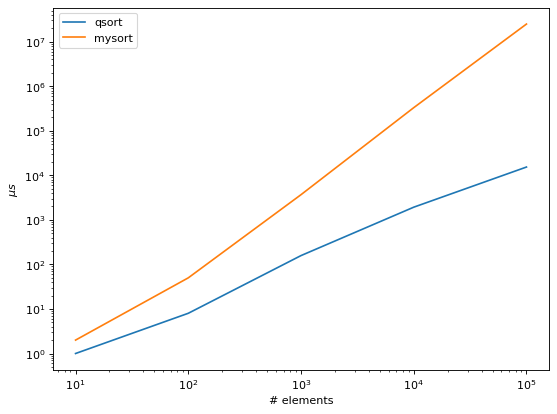

In [27]:
plot_profile(df)

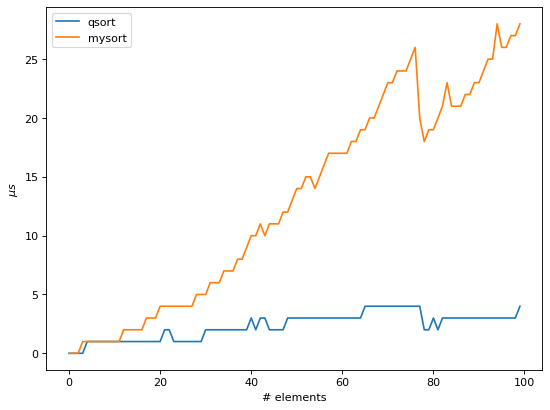

In [28]:
plot_profile(profile(list(range(100))), log_x=False, log_y=False)

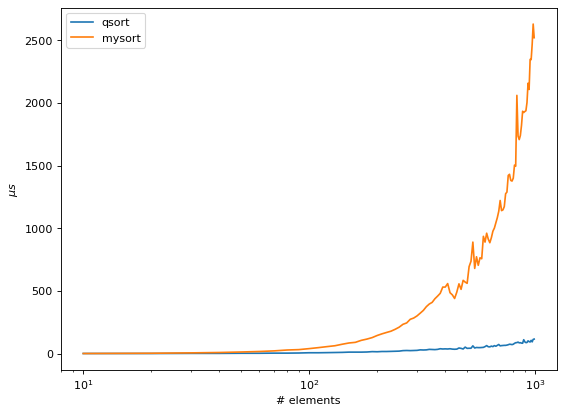

In [31]:
plot_profile(profile(list(range(10, 1000, 10))), log_y=False)

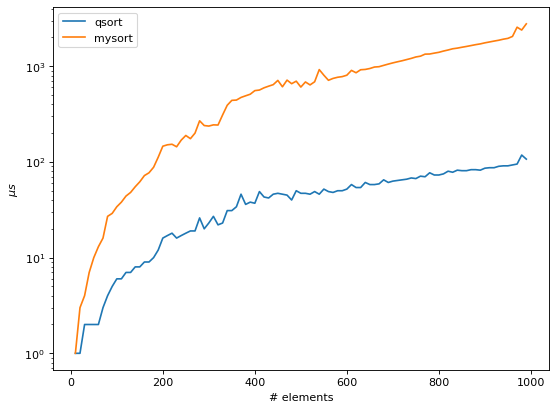

In [30]:
plot_profile(profile(list(range(10, 1000, 10))), log_x=False, log_y=True)